In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# pip install plotly==3.10.0

from collections import Counter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # datetime 
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly 
from scipy import stats


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/us-accidents/US_Accidents_Dec19.csv


In [2]:
use_cols = ['Start_Time', 'Severity', 'County', 'State', 'Weather_Condition', 'Visibility(mi)', 'Humidity(%)']
raw = pd.read_csv(r'/kaggle/input/us-accidents/US_Accidents_Dec19.csv')
df =  pd.read_csv(r'/kaggle/input/us-accidents/US_Accidents_Dec19.csv', usecols = use_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   County             object 
 3   State              object 
 4   Humidity(%)        float64
 5   Visibility(mi)     float64
 6   Weather_Condition  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 158.8+ MB


In [3]:
df[['date','time']] = df['Start_Time'].str.split(' ', expand = True)
df['date'] = pd.to_datetime(df['date'])
date = df['date']

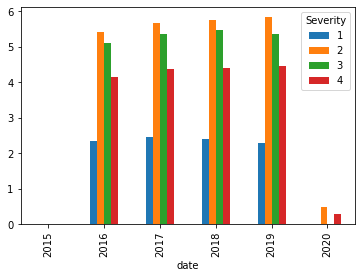

In [4]:
group1 = df.groupby(pd.DatetimeIndex(date).year).Severity.value_counts()
np.log10(group1).unstack(fill_value=0).plot.bar()


I logged the values with base 10 simply because the counts were too high and the lower counts seems too low and neglected. So what you see will be inverse log of base 10.

In [5]:
df['YYYY-MM'] = df.date.dt.strftime("%Y-%m")


this is to split the date from YYYY-MM-dd format to YYYY-MM format and plot a monthly chart.

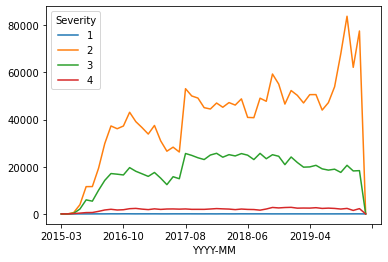

In [6]:
group2 = df.groupby(df['YYYY-MM']).Severity.value_counts()
group2.unstack(fill_value=0).plot.line()


this shows line graph for each month's accidents records based on severity. Notice for Severity level 1 may seem 0 but the value of occurance is way too low compare to the Severity level 2 and 3 count numbers.

In [7]:
humidity = df['Humidity(%)'].value_counts().sort_index()

In [8]:
y = humidity
x = range(1,101)
slope, intercept, r_value, p_value, std_err = stats.linregress(range(1, 101), y)

In [9]:
r_value**2

0.5225073211117913

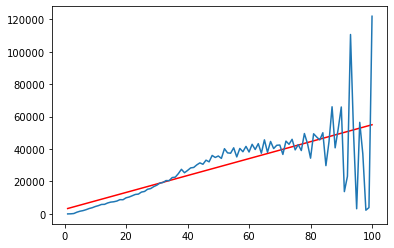

In [10]:
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(humidity)
plt.show()

This shows numbers of accidnet occurs accordingly to humidity  in %. Red line represents the linear regression of it.
The R^2 Value turned out to be 0.522 which I doubt may not be as accurate.

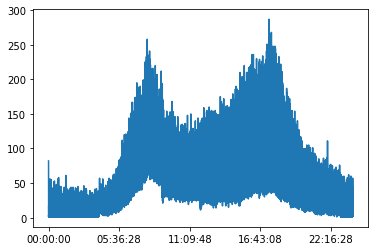

In [11]:
df.time.value_counts().sort_index().plot.line()

This is the time-accident chart. It shows which time has lowest and highest accidents occurred.